# Tuning Tamura surface fluxes
## Diagnosing model result without tuning
The starting point is defined by the raw Tamura 2008 daily surface net heat and surface freshwater fluxes and daily surface stresses derived from EraInterim winds. This setup results in the following stratification.

In [12]:
#import bunch of packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src/visualization/' directory as one where we can import modules
vis_dir = os.path.join(os.pardir,'src','visualization','')
sys.path.append(vis_dir)

# import my methods, make sure they get reloded by each call
%aimport plot_vslice
from plot_vslice import plot_vslice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Year 5 annual averaged temperature and salinity stratification through Weddell Sea and FRIS compared to initial stratification

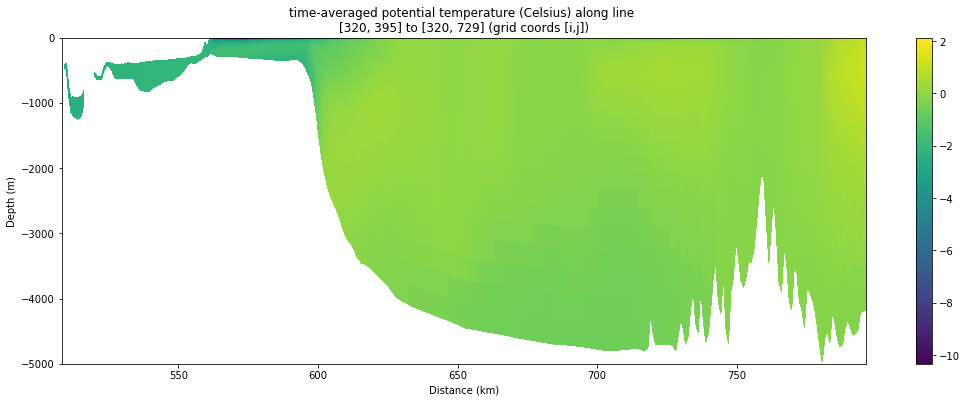

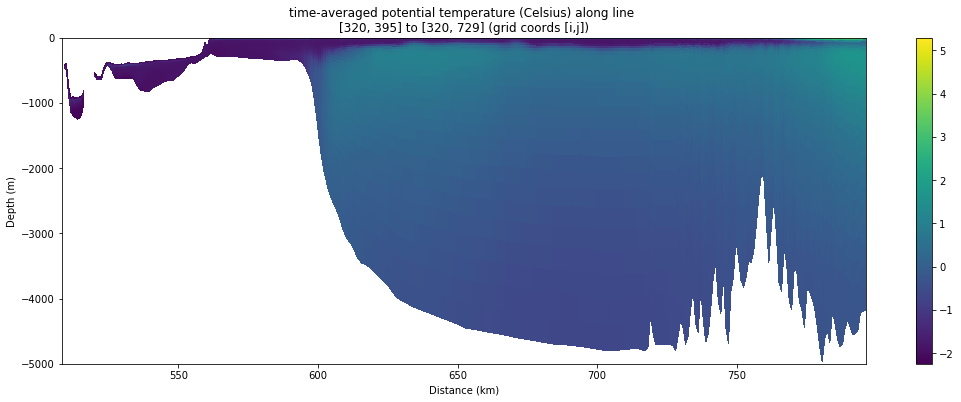

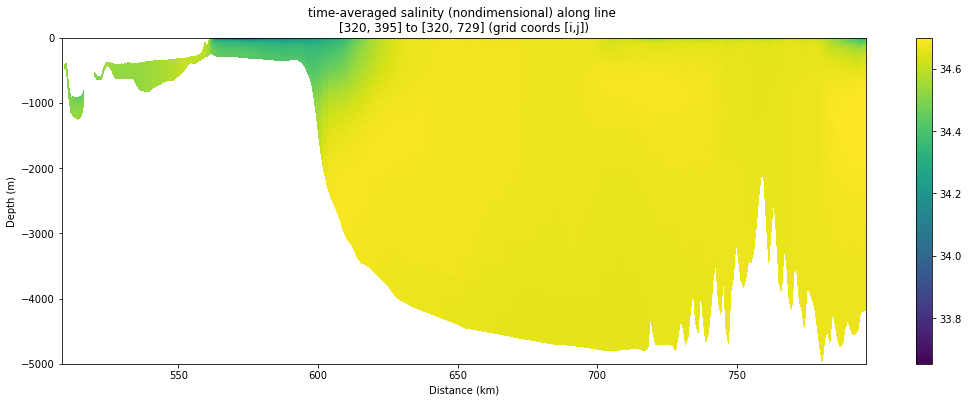

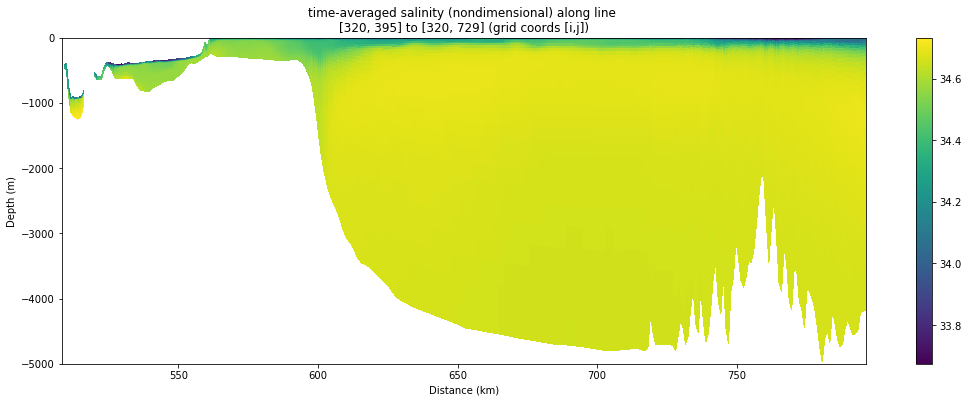

In [58]:
raw_dir = os.path.join(os.pardir,'data','raw')
avg_5yr_file =  os.path.join(raw_dir,'waom10_full_forcing','ocean_avg_0005.nc')
his_1yr_file = os.path.join(raw_dir,'waom10_full_forcing','ocean_avg_0001.nc')
i_min, j_min, i_max, j_max = [320,395,320,729]
plt.clf()
plot_vslice(avg_5yr_file,'temp',0,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,-1)
plot_vslice(his_1yr_file,'temp',0,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31)
plot_vslice(avg_5yr_file,'salt',0,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,-1)
plot_vslice(his_1yr_file,'salt',0,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31)

### Snapshot temperature and salinity stratification (colorbar bounds preset) at the end of melt season (Feb)

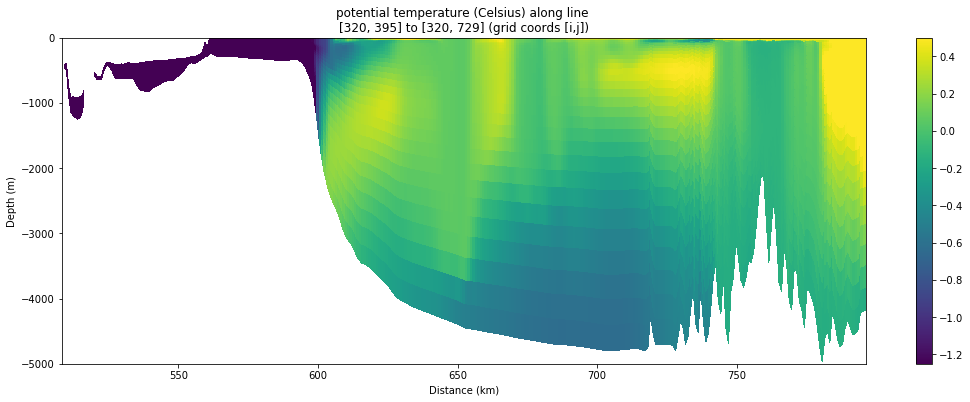

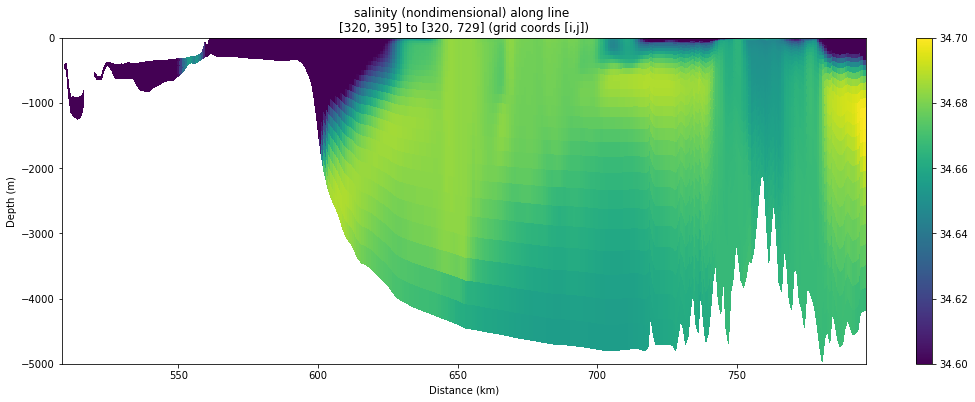

In [56]:
his_5yr_file =  os.path.join(raw_dir,'waom10_full_forcing','ocean_his_0005.nc')
plot_vslice(his_5yr_file,'temp',1,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,vmin=-1.25,vmax=0.5)
plot_vslice(his_5yr_file,'salt',1,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,vmin=34.6,vmax=34.7)

... we get temperatures way below the surface freezing point at the ice shelf front (see also basic diagnostics sst widget). This is likely because there is no coupling between the ocean and the heat flux forcing. E.g. the heat flux is allowed to take heat out of the ocean, even if the sea surface temperature is already at the freezing temperature.
Also, there is a lot of mixing in the open ocean, possibly due to deep convection events driven by salt. Salt might be the driving force since salt values continue right to the surface while temperature values seem to differ between surface and interior water column. Roms is to salty compared to sose at the surface (see basic diagnostics notebook sss comparison).
Over rough topography, the mixing might be due to tides.
## Effect of sst relaxation
The modifications are twofold.
1. if sst goes below the freezing point, surface net heat flux is relaxed towards the freezing point
2. In summer we relax surface net heat flux to SOSE SST with a sensitifity of -40 W/m^2/K.

### Annual average temperature stratification full forcing vs QCORRECT

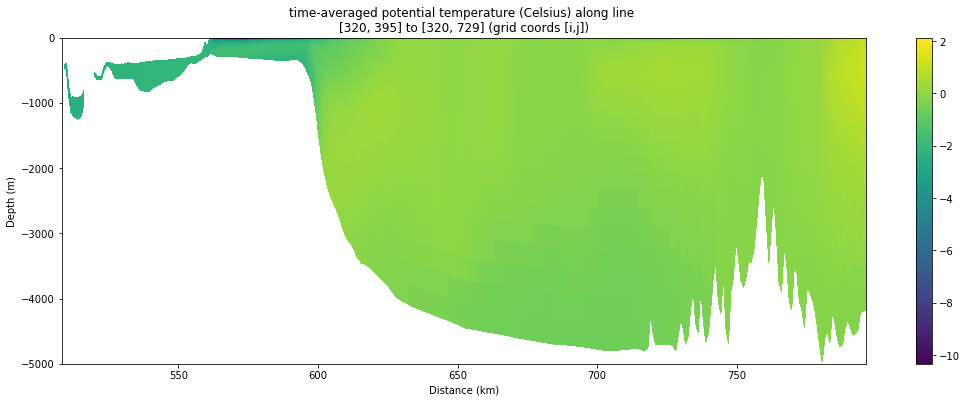

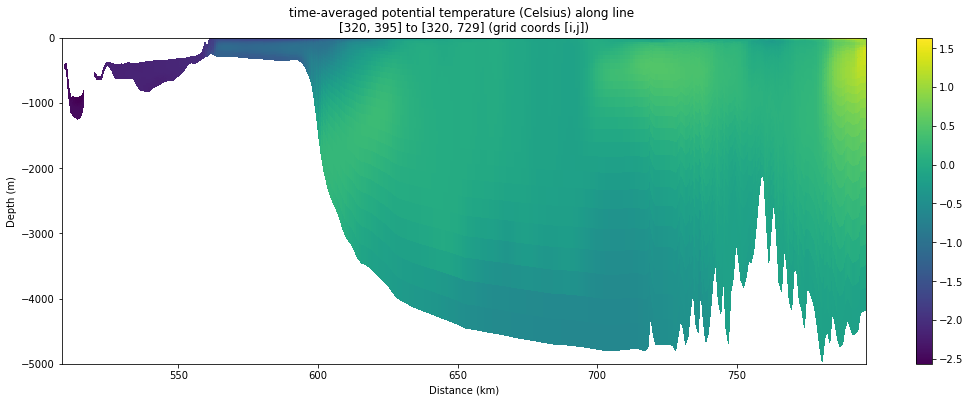

In [52]:
avg_5yr_QCORR_file = os.path.join(raw_dir,'waom10_QCORRECT','ocean_avg_0005.nc')
plot_vslice(avg_5yr_file,'temp',0,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,-1)
plot_vslice(avg_5yr_QCORR_file,'temp',0,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,-1)

... temperatures look already way better! the coldes values are -2.5 now and found at the grounding line. SST at the ice front is about at surface freezing point (-1.9 degC)

### Snapshot temperature stratification (colorbar bounds preset) at the end of melt season (Feb) full forcing vs. QCORRECTION

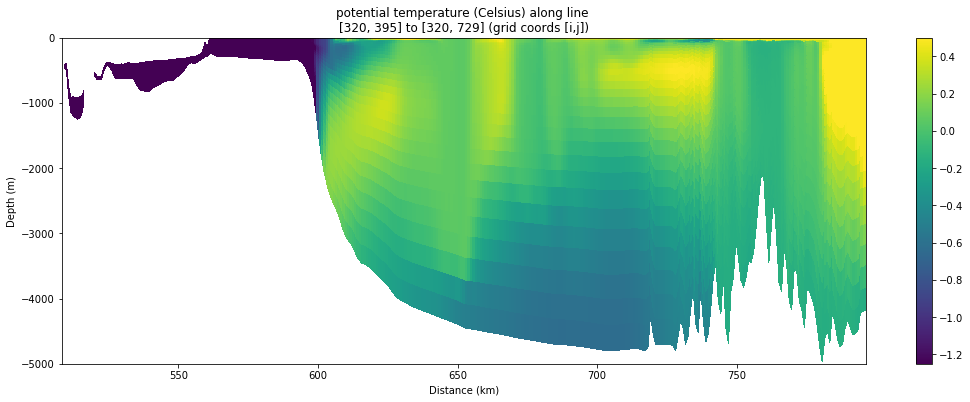

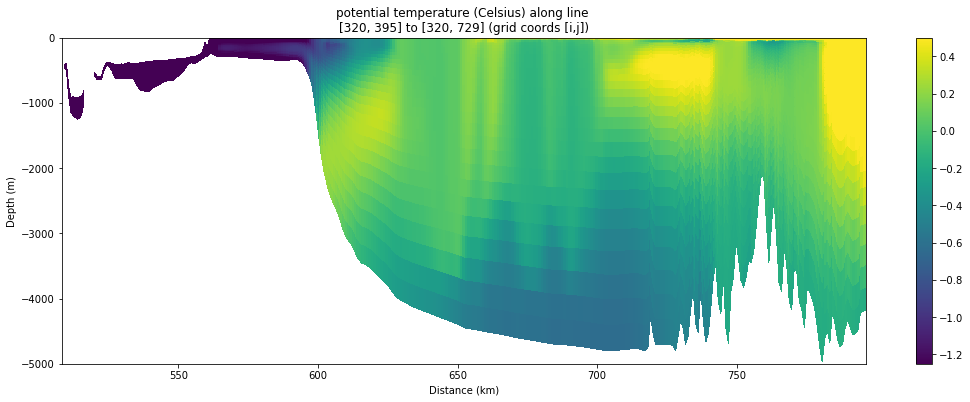

In [50]:
his_5yr_QCORR_file = os.path.join(raw_dir,'waom10_QCORRECT','ocean_his_0005.nc')
plot_vslice(his_5yr_file,'temp',1,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,vmin=-1.25,vmax=0.5)
plot_vslice(his_5yr_QCORR_file,'temp',1,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,vmin=-1.25,vmax=0.5)

... the ocean is still to mixed in the interior.

## Effect of deactivating tides
Simply by dactivating tides we expect a more stratified ocean. In particular the stratification along the northern boundary is expected to be similar to the interior one.

### Snapshot temperature stratification (colorbar bounds preset) at the end of melt season (Feb) full forcing vs. NoTides

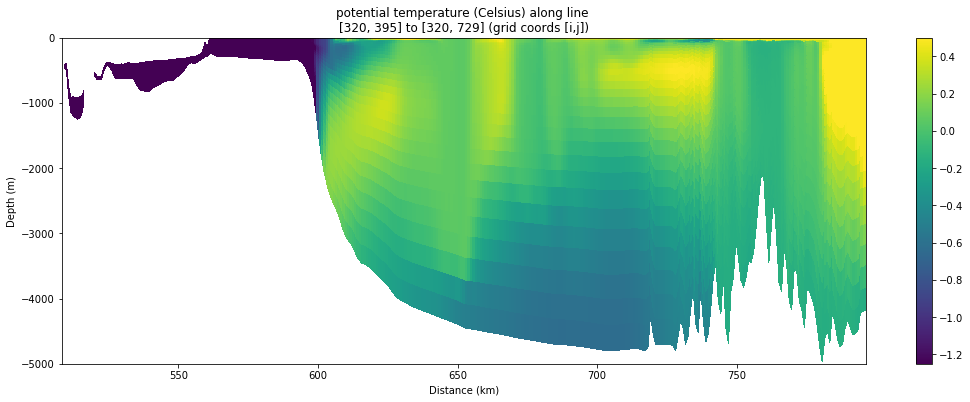

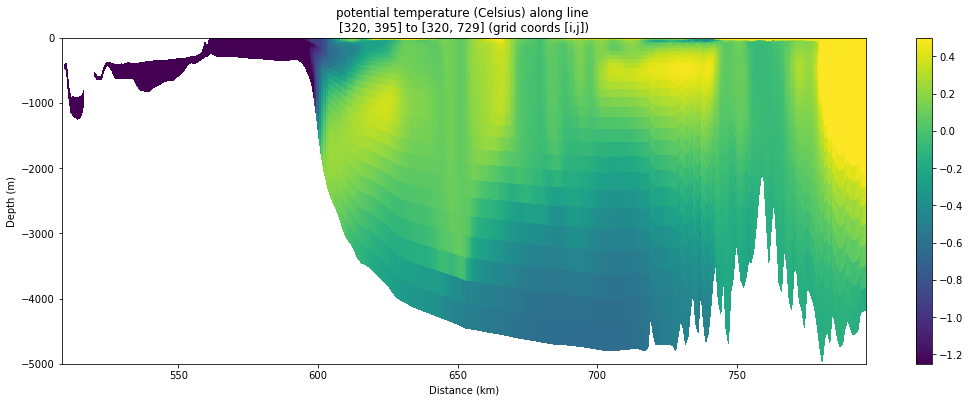

In [51]:
his_5yr_NT_file = os.path.join(raw_dir,'waom10_NT','ocean_his_0005.nc')
plot_vslice(his_5yr_file,'temp',1,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,vmin=-1.25,vmax=0.5)
plot_vslice(his_5yr_NT_file,'temp',1,-5000,0,i_min,j_min,i_max,j_max,4,4,0.9,50,31,vmin=-1.25,vmax=0.5)

... turning off tides doesn't make much of a difference. The ocean seems slightly more stratified.

## The effect of sea surface freshwater flux relaxation to SSS from SOSE